# тесты алгоритмов

## общие переменные

In [1]:
import processing
from pathlib import Path
import numpy as np

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


пути к нашему датасету

In [2]:
root = Path("alg_test")
original_folder = root / Path("original")
blurred_folder = root / Path("blurred")
kernel_folder = root / Path("ground_truth_filters")
kernel_data_folder = root / Path("kernel_data")
restored_kernel_folder = root / Path("restored_kernel")
restored_folder = root / Path("restored")
table_folder = root / Path("tables")


пути к ядрам

In [3]:
convolved_kernel_png = kernel_folder / Path("convolved_kernel.png")
convolved_kernel_npy = kernel_data_folder / Path("convolved_kernel.npy")

In [4]:
defocusdisk_png = kernel_folder / Path("defocusdisk.png")
defocusdisk_npy = kernel_data_folder / Path("defocusdisk.npy")

In [5]:
defocusgaussian_png = kernel_folder / Path("defocusgaussian.png")
defocusgaussian_npy = kernel_data_folder / Path("defocusgaussian.npy")

In [6]:
defocusring_png = kernel_folder / Path("defocusring.png")
defocusring_npy = kernel_data_folder / Path("defocusring.npy")

In [7]:
motionbsplinesimplecurve_png = kernel_folder / Path("motionbsplinesimplecurve.png")
motionbsplinesimplecurve_npy = kernel_data_folder / Path("motionbsplinesimplecurve.npy")

In [8]:
motionlinearexp_png = kernel_folder / Path("motionlinearexp.png")
motionlinearexp_npy = kernel_data_folder / Path("motionlinearexp.npy")

In [9]:
motionlinearuniform_png = kernel_folder / Path("motionlinearuniform.png")
motionlinearuniform_npy = kernel_data_folder / Path("motionlinearuniform.npy")

In [10]:
stretched_gaussian_kernel_png = kernel_folder / Path("stretched_gaussian_kernel.png")
stretched_gaussian_kernel_npy = kernel_data_folder / Path("stretched_gaussian_kernel.npy")

# Airplane.png

## Algorithm 1

### общие переменные

In [11]:
Processor = processing.Processing(original_folder,blurred_folder,restored_folder,table_folder,False,restored_kernel_folder)
image_filename = "airplane.png"
Processor.read_one(image_filename)

### convolved_kernel

In [ ]:
from algorithms.unsorted.HQMotionBlurRestoration.HQMBR import HQMBR
from algorithms.unsorted.HQMotionBlurRestoration.convolve  import create_line_psf
predict_psf = create_line_psf(np.pi/4, 10, (11, 11))
algorithm_HQMotionBlurRestoration = HQMBR(1,predict_psf= predict_psf, MAX_ITER=50)

Processor.save_filter()
Processor.custom_filter(convolved_kernel_png,convolved_kernel_npy)

Processor.process(algorithm_HQMotionBlurRestoration)

Processor.show_line(window_scale=2.0,fontsize=8)


0.0021148187819410476
SSIM calculation error: win_size exceeds image extent. Either ensure that your images are at least 7x7; or pass win_size explicitly in the function call, with an odd value less than or equal to the smaller side of your images. If your images are multichannel (with color channels), set channel_axis to the axis number corresponding to the channels.
Restored: airplane_convolved_kernel_HQMBR_1.png (PSNR: 6.51, SSIM: nan)


d:\for_proga\franework_deconvolution\framework (9)\metrics.py:17: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  return peak_signal_noise_ratio(original, restored)


2.4436656676278795e-05
SSIM calculation error: win_size exceeds image extent. Either ensure that your images are at least 7x7; or pass win_size explicitly in the function call, with an odd value less than or equal to the smaller side of your images. If your images are multichannel (with color channels), set channel_axis to the axis number corresponding to the channels.
Restored: airplane_defocusdisk_HQMBR_13.png (PSNR: 6.51, SSIM: nan)


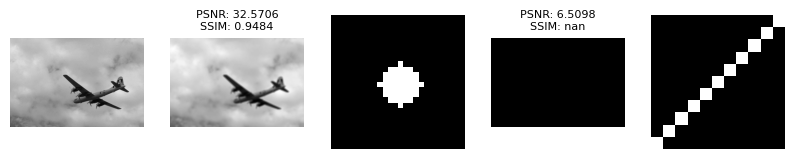

In [13]:
from algorithms.unsorted.HQMotionBlurRestoration.HQMBR import HQMBR
from algorithms.unsorted.HQMotionBlurRestoration.convolve  import create_line_psf
predict_psf = create_line_psf(np.pi/4, 10, (11, 11))
algorithm_HQMotionBlurRestoration = HQMBR(1,predict_psf= predict_psf, MAX_ITER=50)

Processor.save_filter()
Processor.custom_filter(defocusdisk_png,defocusdisk_npy)

Processor.process(algorithm_HQMotionBlurRestoration)

Processor.show_line(window_scale=2.0,fontsize=8)

In [14]:
Processor.get_table(table_folder / f"{image_filename}_{algorithm_HQMotionBlurRestoration.get_name()}.csv",True)

,original,kernel blur,blurred,blurred psnr,blurred ssim,kernel_HQMBR,HQMBR,psnr_HQMBR,ssim_HQMBR
0,alg_test\original\airplane.png,alg_test\ground_truth_filters\convolved_kernel...,alg_test\blurred\airplane_convolved_kernel.png,25.985003,0.883540,alg_test\restored\airplane_convolved_kernel_HQ...,alg_test\restored\airplane_convolved_kernel_HQ...,6.509778,NaN
1,alg_test\original\airplane.png,alg_test\ground_truth_filters\defocusdisk.png,alg_test\blurred\airplane_defocusdisk.png,32.570606,0.948353,alg_test\restored\airplane_defocusdisk_HQMBR_k...,alg_test\restored\airplane_defocusdisk_HQMBR_1...,6.509778,NaN


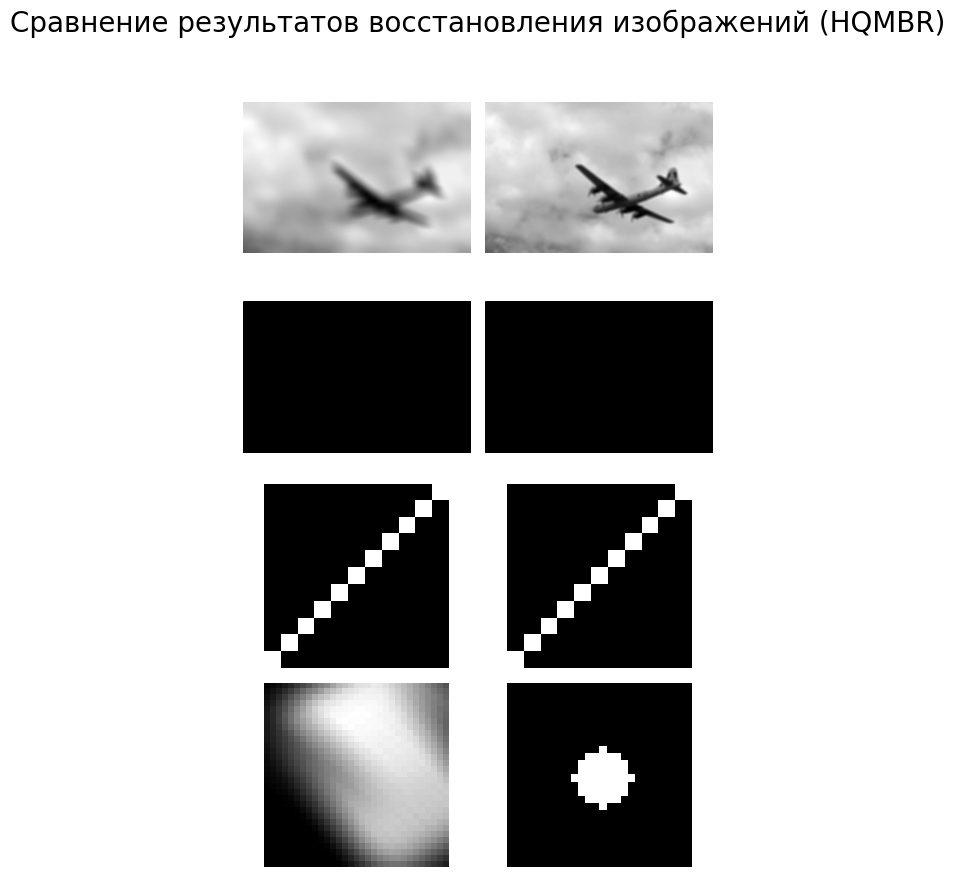

In [13]:
from algorithms.unsorted.HQMotionBlurRestoration.HQMBR import HQMBR
image_filename = "airplane.png"
algorithm_name = HQMBR(1,predict_psf = None, MAX_ITER=50).get_name()

processing.show_from_table(table_folder / f"{image_filename}_{algorithm_name}.csv",
                           algorithm_name,
                           window_scale=0.5)

## Algorithm 2